In [1]:
import pandas as pd
import numpy  as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Lenovo\Documents\KAGGLE\titanic\train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.corr()['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [7]:
Sex      = pd.get_dummies(df['Sex'],drop_first=True)
Embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [9]:
df = pd.concat([df,Sex,Embarked],axis=1)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [11]:
df = df.drop(['Sex','Embarked'],axis=1)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


<AxesSubplot:>

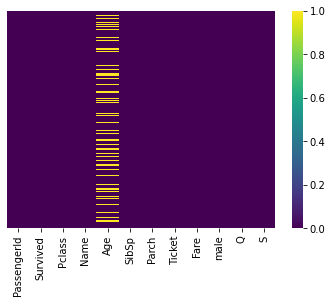

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [14]:
df = df.drop('Cabin',axis=1)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

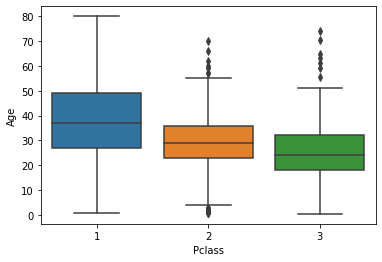

In [17]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [18]:
def impute_age(cols):
    Age   = cols[0]
    Pclass= cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 26
    else:
        return Age

In [19]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [21]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1
5,6,0,3,"Moran, Mr. James",26.0,0,0,330877,8.4583,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,0,0,0


<AxesSubplot:>

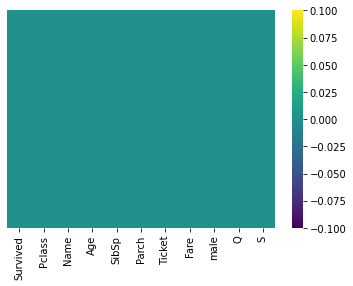

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [23]:
df = df.drop('PassengerId',axis=1)

In [25]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   male      891 non-null    uint8  
 9   Q         891 non-null    uint8  
 10  S         891 non-null    uint8  
dtypes: float64(2), int64(4), object(2), uint8(3)
memory usage: 58.4+ KB


In [177]:
Name   = df['Name'].values
Ticket = df['Ticket'].values

KeyError: 'Name'

In [39]:
from sklearn.preprocessing import OrdinalEncoder

In [40]:
Ordinal_Encoder = OrdinalEncoder()

In [48]:
Name = Name.reshape(-1,1)

In [44]:
Ticket = Ticket.reshape(-1,1)

In [50]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [51]:
s = (df.dtypes=='object')

In [52]:
O_C = list(s[s].index)

In [55]:
print(O_C)

['Name', 'Ticket']


In [57]:
objects = df[O_C].copy()

In [58]:
objects

,Name,Ticket
0,"Braund, Mr. Owen Harris",A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,"Allen, Mr. William Henry",373450
...,...,...
886,"Montvila, Rev. Juozas",211536
887,"Graham, Miss. Margaret Edith",112053
888,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607
889,"Behr, Mr. Karl Howell",111369


In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
OneHot = OneHotEncoder()

In [176]:
Name_Encoded = pd.DataFrame(OneHot.transform(Name))

ValueError: Expected 2D array, got 1D array instead:
array=['Name1'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [104]:
Name = ['Name1']

In [105]:
Ticket = ['Ticket1']

In [106]:
Name_Encoded.columns = Name

In [158]:
Name_Encoded.head()

,Name1
0,"(0, 108)\t1.0"
1,"(0, 190)\t1.0"
2,"(0, 353)\t1.0"
3,"(0, 272)\t1.0"
4,"(0, 15)\t1.0"


In [157]:
Ticket_Encoded = pd.DataFrame(OneHot.fit_transform([Ticket]))

In [153]:
Ticket_Encoded.columns = Ticket

In [155]:
Ticket_Encoded

,Ticket1
0,"(0, 0)\t1.0"


In [101]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [111]:
df = pd.concat([df,Name_Encoded,Ticket_Encoded],axis=1)

In [112]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S,Name,Ticket,Name1,Ticket1
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,"(0, 108)\t1.0","(0, 523)\t1.0","(0, 108)\t1.0","(0, 523)\t1.0"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,"(0, 190)\t1.0","(0, 596)\t1.0","(0, 190)\t1.0","(0, 596)\t1.0"
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,"(0, 353)\t1.0","(0, 669)\t1.0","(0, 353)\t1.0","(0, 669)\t1.0"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,"(0, 272)\t1.0","(0, 49)\t1.0","(0, 272)\t1.0","(0, 49)\t1.0"
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,"(0, 15)\t1.0","(0, 472)\t1.0","(0, 15)\t1.0","(0, 472)\t1.0"


In [113]:
df = df.drop(['Name','Ticket'],axis=1)

In [114]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name1,Ticket1
0,0,3,22.0,1,0,7.2500,1,0,1,"(0, 108)\t1.0","(0, 523)\t1.0"
1,1,1,38.0,1,0,71.2833,0,0,0,"(0, 190)\t1.0","(0, 596)\t1.0"
2,1,3,26.0,0,0,7.9250,0,0,1,"(0, 353)\t1.0","(0, 669)\t1.0"
3,1,1,35.0,1,0,53.1000,0,0,1,"(0, 272)\t1.0","(0, 49)\t1.0"
4,0,3,35.0,0,0,8.0500,1,0,1,"(0, 15)\t1.0","(0, 472)\t1.0"


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    uint8  
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
 9   Name1     891 non-null    object 
 10  Ticket1   891 non-null    object 
dtypes: float64(2), int64(4), object(2), uint8(3)
memory usage: 58.4+ KB


In [129]:
test = pd.read_csv(r'C:\Users\Lenovo\Documents\KAGGLE\titanic\test.csv')

In [130]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [131]:
test = test.drop(['PassengerId','Cabin'],axis=1)

In [132]:
Sex = pd.get_dummies(test['Sex'],drop_first=True)
Embarked = pd.get_dummies(test['Embarked'],drop_first=True)

In [133]:
test = pd.concat([test,Sex,Embarked],axis=1)

In [137]:
test.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,0
3,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1


In [136]:
test = test.drop(['Sex','Embarked'],axis=1)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

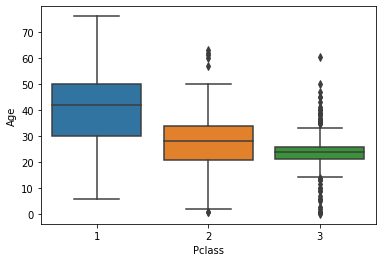

In [193]:
sns.boxplot(x='Pclass',y='Age',data=test)

In [194]:
df2 = pd.read_csv(r'C:\Users\Lenovo\Documents\KAGGLE\titanic\test.csv')

In [139]:
def impute_test_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 28
        else:
            return 24
    else:
        return Age

In [140]:
test['Age'] = test[['Age','Pclass']].apply(impute_test_age,axis=1)

In [141]:
test.head(20)

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,0
3,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1
5,3,"Svensson, Mr. Johan Cervin",14.0,0,0,7538,9.2250,1,0,1
6,3,"Connolly, Miss. Kate",30.0,0,0,330972,7.6292,0,1,0
7,2,"Caldwell, Mr. Albert Francis",26.0,1,1,248738,29.0000,1,0,1
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,0,0,2657,7.2292,0,0,0
9,3,"Davies, Mr. John Samuel",21.0,2,0,A/4 48871,24.1500,1,0,1


<AxesSubplot:>

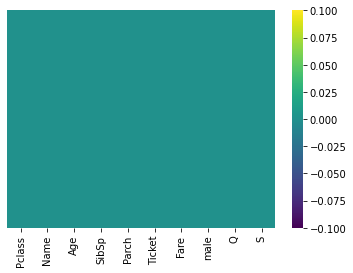

In [142]:
sns.heatmap(test.isnull(),yticklabels=False,cmap='viridis')

In [170]:
Name_test   = test['Name'].values
Ticket_test = test['Ticket'].values

In [174]:
Name_test = Name_test.reshape(-1,1)
Ticket_test = Ticket_test.reshape(-1,1)

In [179]:
Ticket_encoded = OneHot.transform(Ticket_test)

ValueError: Found unknown categories ['113054', '315154', '29750', '342441', 'SOTON/O.Q. 3101314', '347467', '349250', '367227', '26360', '364859', 'A/4 31416', '392095', '2698', '28004', '36928', '370368', '16966', '330920', '350416', '363272', 'SC 14888', '347065', '345775', 'LP 1588', '230136', 'PC 17558', 'SOTON/O.Q. 3101308', '2684', '2650', '680', 'W.E.P. 5734', '365235', '345572', '236854', '17463', '368702', 'SOTON/O.Q. 3101263', 'A/4 48873', 'PC 17594', 'C.A. 34644', '248746', '343271', 'PC 17483', '350405', '2655', '367226', '3701', '334915', 'SC/A4 23568', '315083', '113791', 'S.C./PARIS 2079', '329944', '349238', '349229', 'F.C.C. 13534', 'CA. 2343', 'SC/PARIS 2168', '110489', '4133', '110813', '233734', 'PC 17760', '368364', '11778', '11770', 'A. 2. 39186', '2660', '13508', '382652', '237789', '2657', '2003', '347471', '350054', '349909', 'PC 17569', '2653', '29107', '1222', '330844', 'C.A. 37671', '7266', 'F.C. 12750', '36568', '24065', '330972', '220845', '349235', '2661', 'SOTON/O2 3101284', '349256', 'W./C. 6607', 'SC/PARIS 2148', 'C.A. 30769', '2679', '349202', 'W./C. 6608', '19924', '315095', '2675', '237393', '335432', 'SC/AH 3085', '113790', '370129', '364858', '350033', '348125', '315091', '330910', '376563', '28666', 'CA 2144', '350053', 'C 17368', '2622', '12749', 'PP 9549', '345501', '250650', '350410', '21332', '113509', 'C.A. 34050', 'PC 17608', '13905', '28133', 'W./C. 14260', '348122', 'PC 17761', '330968', '244368', 'AQ/4 3130', '2681', '24160', '2621', '13567', '694', '9232', '315153', 'PC 17599', '349220', '2682', '13050', '2625', '226875', '330924', '2673', '17475', 'A.5. 3236', '364498', '347086', '330911', 'A./5. 3338', '28221', '349911', 'C.A. 2673', '28220', '26707', 'C.A. 49867', '244358', '112377', '17765', '21228', '113780', '349226', '359306', '364856', '2926', '11765', '345498', 'F.C. 12998', '248726', '366713', '349910', '19928', '2543', '334914', 'C.A. 6212', '248738', '368573', '244346', '236853', '370374', 'SC/PARIS 2166', '2668', '113773', '11769', 'C.A. 15185', '363611', '349211', '239059', '113778', 'A/4 48871', 'A/5. 851', '237735', '315152', 'SC/Paris 2123', 'PC 17531', '2670', 'SOTON/O.Q. 3101315', 'A/5 1478', '112378', 'PC 17598', '113044', '240276', 'S.O.C. 14879', 'PC 17580', 'SC/PARIS 2147', '371362', '392091', '17770', 'PC 17606', '3410', 'PC 17591', '350408', 'PC 17759', '111163', '2680', '112058', '110469', '2662', '347469', '29105', 'C.A. 42795', 'C.A. 31029', 'PC 17562', '237670', '28034', '347090', '237249', '345768', '11813', '347066', '2658', '242963', '2692', '33638', '7935', '3101298', '240261', '342684', '2689', '383123', '13695', '248734', 'SC/PARIS 2167', '2654', '345771', '347077', '315092', 'PC 17607', '347465', 'F.C.C. 13540', 'PC 17585', '112901', 'STON/O 2. 3101291', 'A/5 21175', '347091', '368783', '383162', '3101297', '11753', 'S.O./P.P. 2', '3470', '368402', 'STON/O2. 3101270', '19877', 'C.A. 33595', '347072', '248659', '2696', '7548', '386525', '350026', '365237', 'C.A. 2315', '315087', 'C.A. 31030', 'PC 17597', 'CA 31352', '350409', '113038', 'S.O./P.P. 752', '113796', '2688', '244360', '345763', 'SC/A.3 2861', '211535', '11767', '19950', '349255', '349232', 'PC 17613', 'A/5. 3337', '235509', '1601', '2656', '7538', 'C.A. 34651', '382650', '2678', '112051', '382653', 'STON/OQ. 369943', 'SOTON/O.Q. 3101309', 'SC/PARIS 2159', '113781', '65305', '347075', 'S.O./P.P. 251', '3101295', '350045', 'PC 17757', '2652', 'PC 17758', '29103', 'SOTON/OQ 392083', '349230', '376566', '359309', '342712', 'PC 17756', '113795', 'AQ/3. 30631', '3101266', '250651', 'SC/AH 29037', '2676', '347080', '248744', '113503', '113801', '347079', '233478', 'C 4001', 'PC 17603', 'STON/O 2. 3101268', '228414', '237216', '28664', '330971', '17464', 'PC 17755', '330963', 'W./C. 14266', '32302', '220844', '113059', '370371', '13236', '28404', '350403', 'F.C.C. 13528', '347070', '315085', '371109', 'SOTON/O.Q. 3101262', '237734', 'PC 17592', 'C.A. 33112'] in column 0 during transform

In [187]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name1,Ticket1
0,0,3,22.0,1,0,7.2500,1,0,1,"(0, 108)\t1.0","(0, 523)\t1.0"
1,1,1,38.0,1,0,71.2833,0,0,0,"(0, 190)\t1.0","(0, 596)\t1.0"
2,1,3,26.0,0,0,7.9250,0,0,1,"(0, 353)\t1.0","(0, 669)\t1.0"
3,1,1,35.0,1,0,53.1000,0,0,1,"(0, 272)\t1.0","(0, 49)\t1.0"
4,0,3,35.0,0,0,8.0500,1,0,1,"(0, 15)\t1.0","(0, 472)\t1.0"


In [186]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [184]:
X = df.drop(['Survived','Name1','Ticket1'],axis=1)
y = df['Survived']

In [185]:
test = test.drop(['Name','Ticket'],axis=1)

In [188]:
from xgboost import XGBClassifier

In [241]:
model = XGBClassifier(n_estimators=400,learning_rate=0.0005)

In [242]:
model.fit(X,y)

[20:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0005, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=450, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [243]:
preds = model.predict(test)

In [244]:
preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [245]:
submission = pd.DataFrame({
    "PassengerId" : df2['PassengerId'],
    "Survived" :   preds
})

In [246]:
submission.to_csv('titanic_submission_XG_v2.csv', index=False)